In [2]:
import cv2
import mediapipe as mp

import pandas as pd
import numpy as np

from math import floor

from PIL import Image

import urllib.request

In [3]:
# Initializing Mediapipe

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

In [3]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imshow('img', img)
    cv2.waitKey()
 
# Preview the images.
images = ['image00043.jpg', 'image00054.jpg']
for image in images:
    image = cv2.imread(image)
    resize_and_show(image)

In [4]:
with mp_face_detection.FaceDetection(min_detection_confidence=0.5, model_selection=0) as face_detection:
  for image in images:
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    image = cv2.imread(image)
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {image}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Face detections of [[[242 241 243]
  [242 241 243]
  [242 241 243]
  ...
  [241 240 242]
  [241 240 242]
  [241 240 242]]

 [[242 241 243]
  [242 241 243]
  [242 241 243]
  ...
  [241 240 242]
  [241 240 242]
  [241 240 242]]

 [[242 241 243]
  [242 241 243]
  [242 241 243]
  ...
  [241 240 242]
  [241 240 242]
  [241 240 242]]

 ...

 [[118  92  38]
  [136 110  56]
  [115  87  33]
  ...
  [239 238 242]
  [237 238 242]
  [237 238 242]]

 [[118  91  40]
  [119  92  41]
  [120  91  40]
  ...
  [240 239 243]
  [238 237 241]
  [238 237 241]]

 [[138 111  61]
  [135 108  58]
  [132 100  51]
  ...
  [240 239 243]
  [238 237 241]
  [238 237 241]]]:
Face detections of [[[235 233 239]
  [234 232 238]
  [234 232 238]
  ...
  [227 223 234]
  [229 225 236]
  [229 225 236]]

 [[235 233 239]
  [234 232 238]
  [234 232 238]
  ...
  [227 223 234]
  [229 225 236]
  [229 225 236]]

 [[235 233 239]
  [234 232 238]
  [234 232 238]
  ...
  [227 223 234]
  [229 225 236]
  [229 225 236]]

 ...

 [[185 181 18

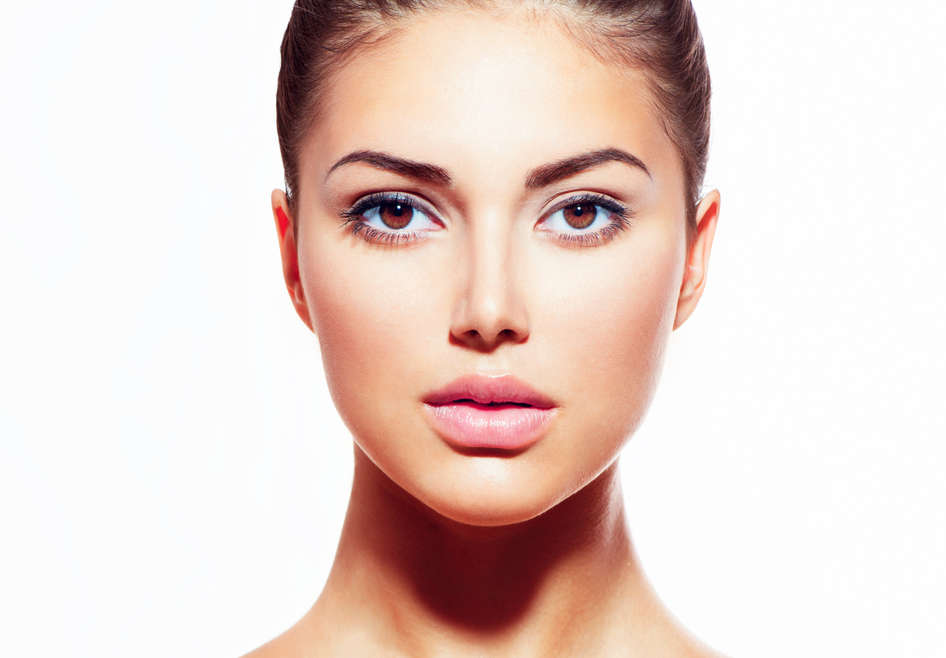

In [8]:
face_url = "https://1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com/wp-content/uploads/shutterstock_149962697-946x658.jpg"
urllib.request.urlretrieve(face_url, "face_image.jpg")

img = Image.open('face_image.jpg')
display(img)

In [9]:
# Define image filename and drawing specifications
file = 'face_image.jpg'
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius = 1)

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode = True,
        max_num_faces = 1,
        refine_landmarks = True,
        min_detection_confidence = 0.5) as face_mesh:

    # Read image file with cv2 and process with face_mesh
    image = cv2.imread(file)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define boolean corresponding to whether or not a face was detected in the image
face_found = bool(results.multi_face_landmarks)

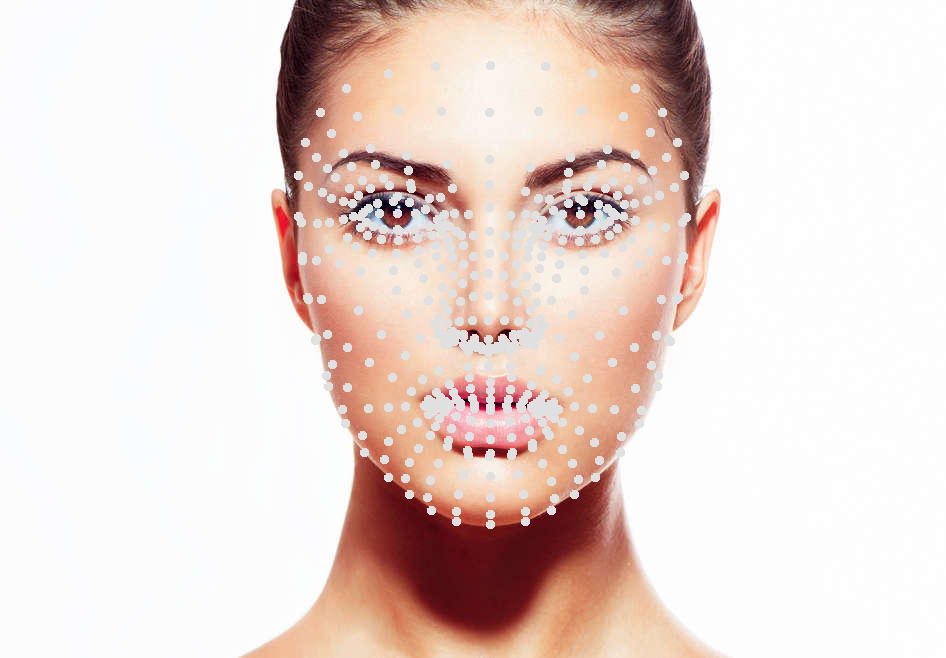

In [10]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image = annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections = None,
        landmark_drawing_spec = mp_drawing_styles.DrawingSpec,
        connection_drawing_spec = None
    )
        
    # Save image
    cv2.imwrite('face_landmarks.png', annotated_image)

# Open image
img = Image.open('face_landmarks.png')
display(img)

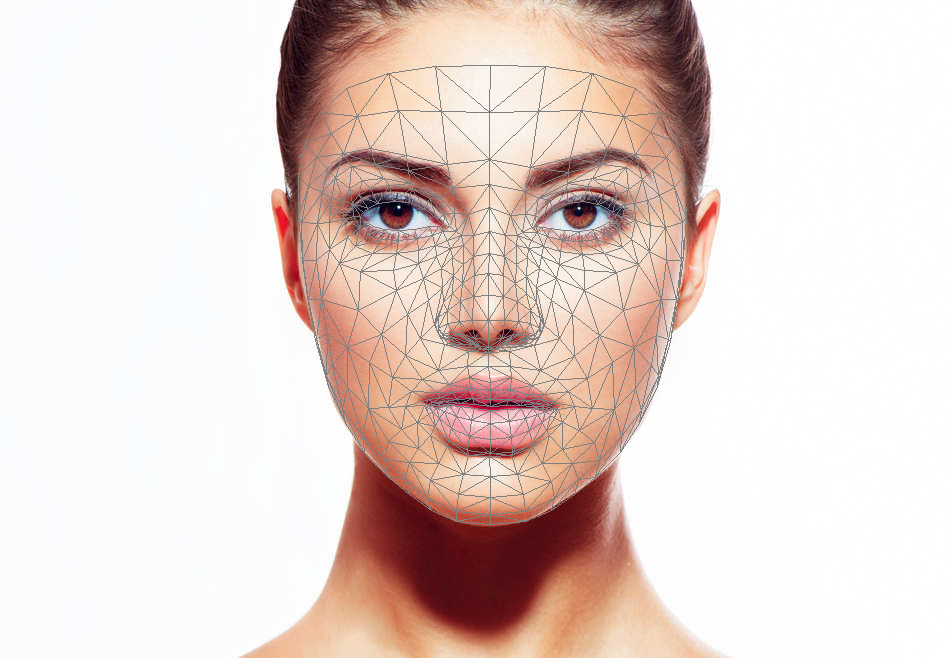

In [9]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image = annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections = mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec = None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
    )
        
    # Save image
    cv2.imwrite('face_tesselation_only.png', annotated_image)

# Open image
img = Image.open('face_tesselation_only.png')
display(img)

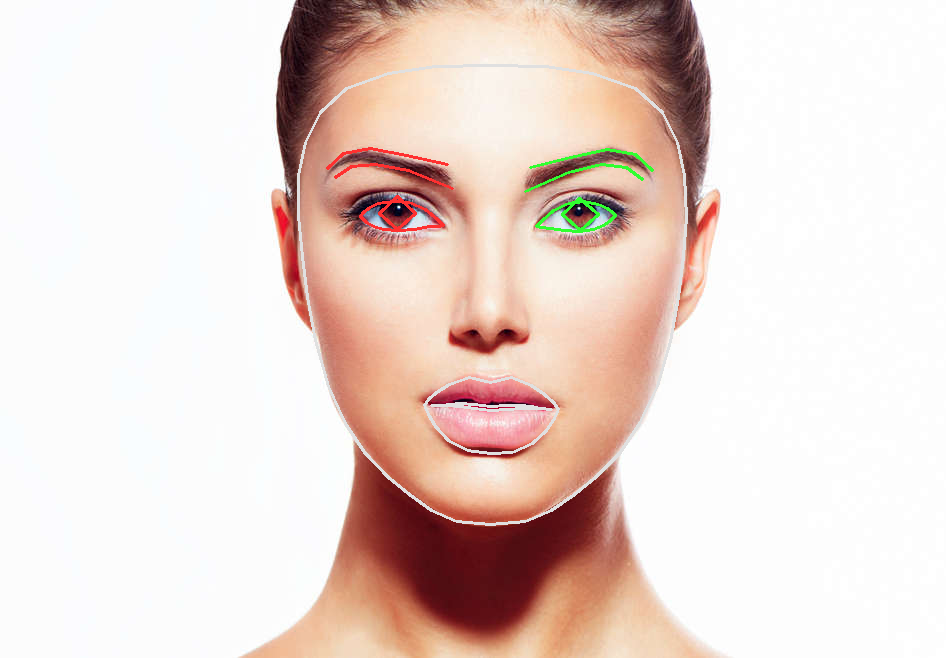

In [12]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # For each face in the image (only one in this case)
    for face_landmarks in results.multi_face_landmarks:
        
        # Draw the facial contours of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())
        
        # Draw the iris location boxes of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())

	# Save the image
    cv2.imwrite('face_contours_and_irises.png', annotated_image)

    # Open image
    img = Image.open('face_contours_and_irises.png')
    display(img)

In [7]:
from math import dist
img = 'image00004.jpg'

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frame = cv2.imread(img)
    image_height, image_width, _ = frame.shape
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make Detections
    results = holistic.process(image)
    print(results.face_landmarks)
    # landmarks = results.face_landmarks.landmark
    # NoseX = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width
    # NoseY = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height
    # LfeoX = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EYE_OUTER].x * image_width
    # LfeoY = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EYE_OUTER].y * image_height

    # distance = dist([NoseX, NoseY], [LfeoX, LfeoY])

    # row = np.array([[ ((landmark.x * image_width) - NoseX) / distance, ((landmark.y * image_height) - NoseY) / distance] for landmark in landmarks]).flatten().tolist()

landmark {
  x: 0.4421223998069763
  y: 0.6435893177986145
  z: -0.02138073928654194
}
landmark {
  x: 0.418456107378006
  y: 0.5883783102035522
  z: -0.04201682657003403
}
landmark {
  x: 0.4514874517917633
  y: 0.6084516644477844
  z: -0.01978074572980404
}
landmark {
  x: 0.4400066137313843
  y: 0.5397579669952393
  z: -0.02102220617234707
}
landmark {
  x: 0.41740351915359497
  y: 0.5730077624320984
  z: -0.0454825684428215
}
landmark {
  x: 0.42949891090393066
  y: 0.5546329021453857
  z: -0.043032072484493256
}
landmark {
  x: 0.47144341468811035
  y: 0.5069882273674011
  z: -0.024891657754778862
}
landmark {
  x: 0.47118881344795227
  y: 0.48852813243865967
  z: 0.10115429013967514
}
landmark {
  x: 0.48525160551071167
  y: 0.4650149643421173
  z: -0.021452724933624268
}
landmark {
  x: 0.48451951146125793
  y: 0.4438723623752594
  z: -0.024472514167428017
}
landmark {
  x: 0.507789134979248
  y: 0.368511438369751
  z: -0.021089013665914536
}
landmark {
  x: 0.4428168535232544
 

In [6]:
row

[-0.41667558576768854,
 0.5938984983605202,
 -0.633475751364762,
 0.08812617997496781,
 -0.33088501137921195,
 0.27201246200666473,
 -0.4360576995032067,
 -0.3572709387577279,
 -0.643118212347729,
 -0.052679031156867506,
 -0.5323157728737593,
 -0.22100589371628993,
 -0.14807411805647927,
 -0.6574651917955023,
 -0.15040644751590587,
 -0.8265728646386612,
 -0.021581214027649925,
 -1.0419703018308963,
 -0.02828771913953269,
 -1.2356516577646541,
 0.18487867552169054,
 -1.9260116223843227,
 -0.4103138930293579,
 0.6707384205978437,
 -0.37380527904231803,
 0.7409638422916828,
 -0.3199331916127484,
 0.7863414782638487,
 -0.3430768452396373,
 0.8053462913657573,
 -0.3818967668707724,
 0.8744687502811714,
 -0.4047510292736191,
 0.9631245707982541,
 -0.3823308537068356,
 1.0525715760014445,
 -0.254527498852155,
 1.1723063759171233,
 -0.5517825198917804,
 0.17235595282773775,
 -0.4776440374298317,
 0.1589767959169734,
 0.1979476924036701,
 -1.3797551098188041,
 -0.03368950664792725,
 -0.66035473

In [12]:
results.face_landmarks.landmark

[x: 0.5157992243766785
y: 0.5917742848396301
z: -0.041323691606521606
, x: 0.5143933892250061
y: 0.5080606937408447
z: -0.09417442977428436
, x: 0.514958918094635
y: 0.5329517126083374
z: -0.04431207850575447
, x: 0.5005084872245789
y: 0.41655755043029785
z: -0.0776204839348793
, x: 0.5145314335823059
y: 0.48030227422714233
z: -0.10242760926485062
, x: 0.5149494409561157
y: 0.4432618319988251
z: -0.09808395802974701
, x: 0.5163389444351196
y: 0.351934552192688
z: -0.059339698404073715
, x: 0.38564157485961914
y: 0.3390241861343384
z: 0.013406354002654552
, x: 0.5166932940483093
y: 0.28694838285446167
z: -0.055149778723716736
, x: 0.5169644355773926
y: 0.24880506098270416
z: -0.063941590487957
, x: 0.5170273184776306
y: 0.09004685282707214
z: -0.059245433658361435
, x: 0.5160692930221558
y: 0.6050991415977478
z: -0.038266781717538834
, x: 0.5165624618530273
y: 0.6144944429397583
z: -0.03135422244668007
, x: 0.5170019865036011
y: 0.6176276206970215
z: -0.02254393696784973
, x: 0.51774489

In [17]:
results.face_landmarks.landmark[0].x

0.5157992243766785

In [29]:
results.face_landmarks.landmark[0].y

0.5917742848396301

In [18]:
landmarks = results.face_landmarks.landmark

In [19]:
len(landmarks)

468

In [81]:
col_names = list()
col_names.append('img')
for val in range(1, len(landmarks)+1):
    col_names += ['x{}'.format(val), 'y{}'.format(val)]
col_names

['img',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21',
 'x22',
 'y22',
 'x23',
 'y23',
 'x24',
 'y24',
 'x25',
 'y25',
 'x26',
 'y26',
 'x27',
 'y27',
 'x28',
 'y28',
 'x29',
 'y29',
 'x30',
 'y30',
 'x31',
 'y31',
 'x32',
 'y32',
 'x33',
 'y33',
 'x34',
 'y34',
 'x35',
 'y35',
 'x36',
 'y36',
 'x37',
 'y37',
 'x38',
 'y38',
 'x39',
 'y39',
 'x40',
 'y40',
 'x41',
 'y41',
 'x42',
 'y42',
 'x43',
 'y43',
 'x44',
 'y44',
 'x45',
 'y45',
 'x46',
 'y46',
 'x47',
 'y47',
 'x48',
 'y48',
 'x49',
 'y49',
 'x50',
 'y50',
 'x51',
 'y51',
 'x52',
 'y52',
 'x53',
 'y53',
 'x54',
 'y54',
 'x55',
 'y55',
 'x56',
 'y56',
 'x57',
 'y57',
 'x58',
 'y58',
 'x59',
 'y59',
 'x60',
 'y60',
 'x61',
 'y61',
 'x62',
 'y62',
 'x63',
 'y63',
 '

In [94]:
type(results.face_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [21]:
col_names.append('Yaw')

In [23]:
col_names.append('Pitch')
col_names.append('Roll')

In [70]:
df = pd.DataFrame(columns = col_names)
df.to_csv("Medipipe_dataset.csv", index = False)

In [68]:
row = np.array([np.array([[landmark.x, landmark.y] for landmark in landmarks]).flatten()])
row.shape

(1, 936)

In [85]:
row_with_image = np.array([[landmark.x, landmark.y] for landmark in landmarks]).flatten().tolist()
row_with_image.insert(0, "image.jgp")

In [86]:
row_with_image

['image.jgp',
 0.5157992243766785,
 0.5917742848396301,
 0.5143933892250061,
 0.5080606937408447,
 0.514958918094635,
 0.5329517126083374,
 0.5005084872245789,
 0.41655755043029785,
 0.5145314335823059,
 0.48030227422714233,
 0.5149494409561157,
 0.4432618319988251,
 0.5163389444351196,
 0.351934552192688,
 0.38564157485961914,
 0.3390241861343384,
 0.5166932940483093,
 0.28694838285446167,
 0.5169644355773926,
 0.24880506098270416,
 0.5170273184776306,
 0.09004685282707214,
 0.5160692930221558,
 0.6050991415977478,
 0.5165624618530273,
 0.6144944429397583,
 0.5170019865036011,
 0.6176276206970215,
 0.5177448987960815,
 0.62305748462677,
 0.5178972482681274,
 0.6346502304077148,
 0.5179030299186707,
 0.6494547128677368,
 0.5180893540382385,
 0.6653450131416321,
 0.5180450081825256,
 0.6911654472351074,
 0.5144022703170776,
 0.5212617516517639,
 0.5005379915237427,
 0.5177019238471985,
 0.3191080093383789,
 0.21992722153663635,
 0.43846628069877625,
 0.3672237694263458,
 0.4203238487243

In [89]:
param_with_image = [row_with_image]


In [80]:
param_with_image

array([['image.jgp', '0.5157992243766785', '0.5917742848396301',
        '0.5143933892250061', '0.5080606937408447', '0.514958918094635',
        '0.5329517126083374', '0.5005084872245789',
        '0.41655755043029785', '0.5145314335823059',
        '0.48030227422714233', '0.5149494409561157',
        '0.4432618319988251', '0.5163389444351196', '0.351934552192688',
        '0.38564157485961914', '0.3390241861343384',
        '0.5166932940483093', '0.28694838285446167',
        '0.5169644355773926', '0.24880506098270416',
        '0.5170273184776306', '0.09004685282707214',
        '0.5160692930221558', '0.6050991415977478', '0.5165624618530273',
        '0.6144944429397583', '0.5170019865036011', '0.6176276206970215',
        '0.5177448987960815', '0.62305748462677', '0.5178972482681274',
        '0.6346502304077148', '0.5179030299186707', '0.6494547128677368',
        '0.5180893540382385', '0.6653450131416321', '0.5180450081825256',
        '0.6911654472351074', '0.5144022703170776',

In [63]:
param = row.copy()

In [64]:
param = np.array([param])
param.shape

(1, 939)

In [90]:
df_temp = pd.DataFrame(param_with_image, columns = col_names)
df_temp

,img,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x464,y464,x465,y465,x466,y466,x467,y467,x468,y468
0,image.jgp,0.515799,0.591774,0.514393,0.508061,0.514959,0.532952,0.500508,0.416558,0.514531,...,0.564539,0.34487,0.553899,0.350597,0.548032,0.355228,0.651615,0.326961,0.660593,0.318674
